In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from qiskit.primitives import Sampler,Estimator
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister,ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import EfficientSU2,RealAmplitudes
from qiskit.algorithms.gradients import ParamShiftEstimatorGradient,ParamShiftSamplerGradient
from qiskit.circuit import ParameterVector
import pickle 
%matplotlib inline

/tmp/ipykernel_480/3577845016.py:9: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.gradients import ParamShiftEstimatorGradient,ParamShiftSamplerGradient


In [2]:
from VQS_header import compute_params_list,compute_magnetization,make_magnetization_op,compute_energy, compute_energyGrad
from quspin_header import getPMag_list

In [3]:
num_qubits = 2
j_coupling = 1/4
h_coupling = 1

num_layers = 3
time_max = 5e0
epsilon_det = 1e-7
num_steps = 500
sampler = Sampler()
estimator = Estimator()
nShots = None

dt=time_max/num_steps
sampler=Sampler()
estimator=Estimator()
num_params = (2*num_qubits-1)*num_layers
print("dt = ",dt)

dt =  0.01


In [4]:
tmp_time_max_list=np.array([1e-2,5e-2,1e-1,5e-1,1e0])
nSample = 50
tmp_num_steps=5

In [5]:
params_init_all = np.random.rand(nSample,num_params)*2*np.pi

In [6]:
# avg_E_diff=[]
# avg_E_diff_en2=[]
# avg_E_diff_en1=[]
# avg_E_diff_e0=[]
# for tmp_time_max in tmp_time_max_list:
#     print(tmp_time_max)
#     E_diff_list = []
#     E_diff_list_en2 = []
#     E_diff_list_en1 = []
#     E_diff_list_e0 = []
#     for i in range(len(params_init_all)):
#         if i%1==0:
#             print(i)
#         params_init = params_init_all[i]
#         tmp_p_list,tmp_E_list=compute_params_list(params_init,num_qubits,num_layers,j_coupling,h_coupling,tmp_num_steps,
#                         tmp_time_max,epsilon_det,sampler,estimator,nShots=nShots,energy_correction=False,
#                        alpha=0.)
#         E_init=tmp_E_list[0]
#         E_diff = tmp_E_list[-1]-tmp_E_list[0]
#         E_diff_list.append(E_diff)

#         tmp_p_list,tmp_E_list=compute_params_list(params_init,num_qubits,num_layers,j_coupling,h_coupling,tmp_num_steps,
#                         tmp_time_max,epsilon_det,sampler,estimator,nShots=nShots,energy_correction=True,
#                        alpha=1e-2)
#         E_diff = tmp_E_list[-1]-E_init
#         E_diff_list_en2.append(E_diff)

#         tmp_p_list,tmp_E_list=compute_params_list(params_init,num_qubits,num_layers,j_coupling,h_coupling,tmp_num_steps,
#                         tmp_time_max,epsilon_det,sampler,estimator,nShots=nShots,energy_correction=True,
#                        alpha=1e-1)
#         E_diff = tmp_E_list[-1]-E_init
#         E_diff_list_en1.append(E_diff)

#         tmp_p_list,tmp_E_list=compute_params_list(params_init,num_qubits,num_layers,j_coupling,h_coupling,tmp_num_steps,
#                         tmp_time_max,epsilon_det,sampler,estimator,nShots=nShots,energy_correction=True,
#                        alpha=1e0)
#         E_diff = tmp_E_list[-1]-E_init
#         E_diff_list_e0.append(E_diff)


#     E_diff_list = np.array(E_diff_list)
#     E_diff_list_en2 = np.array(E_diff_list_en2)
#     E_diff_list_en1 = np.array(E_diff_list_en1)
#     E_diff_list_e0 = np.array(E_diff_list_e0)
#     avg_E_diff.append(abs(E_diff_list).mean())
#     avg_E_diff_en2.append(abs(E_diff_list_en2).mean())
#     avg_E_diff_en1.append(abs(E_diff_list_en1).mean())
#     avg_E_diff_e0.append(abs(E_diff_list_e0).mean())
    
#     print("avg E diff = ", abs(E_diff_list).mean())
#     print("avg E diff = ", abs(E_diff_list_en2).mean())
#     print("avg E diff = ", abs(E_diff_list_en1).mean())
#     print("avg E diff = ", abs(E_diff_list_e0).mean())

# avg_E_diff = np.array(avg_E_diff)
# avg_E_diff_en2 = np.array(avg_E_diff_en2)
# avg_E_diff_en1 = np.array(avg_E_diff_en1)
# avg_E_diff_e0 = np.array(avg_E_diff_e0)
#E_diff_all={'0':avg_E_diff,"1e-2":avg_E_diff_en2,"1e-1":avg_E_diff_en1,"1e0":avg_E_diff_e0}

# with open('{}qubits_{}layers.pkl'.format(num_qubits,num_layers), 'wb') as f:
#     pickle.dump(E_diff_all, f)

In [7]:
# with open('{}qubits_{}layers.pkl'.format(num_qubits,num_layers), 'rb') as f:
#     loaded_dict = pickle.load(f)
# plt.plot(tmp_time_max_list,avg_E_diff/tmp_time_max_list,label='alpha = 0')
# plt.plot(tmp_time_max_list,avg_E_diff_en2/tmp_time_max_list,label='alpha = 1e-2')
# plt.plot(tmp_time_max_list,avg_E_diff_en1/tmp_time_max_list,label='alpha = 1e-1')
# plt.plot(tmp_time_max_list,avg_E_diff_e0/tmp_time_max_list,label='alpha = 1')
# plt.xscale('log')
# plt.legend()

In [8]:
def getMagList(params_init,num_qubits,num_layers,j_coupling,h_coupling,num_steps,
                        time_max,epsilon_det,sampler,estimator,nShots=nShots,energy_correction=False,
                       alpha=0.):
    p_list,E_list=compute_params_list(params_init,num_qubits,num_layers,j_coupling,h_coupling,num_steps,
                        time_max,epsilon_det,sampler,estimator,nShots=nShots,energy_correction=energy_correction,
                       alpha=alpha)

    mag_list = []
    for step in range(num_steps):
        params = p_list[step]
        mag = compute_magnetization(params,num_qubits,num_layers,estimator)
        mag_list.append(mag)
    return mag_list,p_list,E_list

simulation

In [9]:
num_qubits = 2
j_coupling = 1/4
h_coupling = 1

num_layers = 2
time_max = 20
epsilon_det = 1e-7
num_steps = 200
sampler = Sampler()
estimator = Estimator()
nShots = None

dt=time_max/num_steps
num_params = (2*num_qubits-1)*num_layers
params_init =[np.pi/6]*num_params

#params_init=np.random.rand(num_params)
print(dt)

0.1


In [10]:
p_list_ED, mag_list_ED=getPMag_list(params_init,num_layers,num_qubits,j_coupling,h_coupling,time_max,num_steps)

/home/zhelunli/miniconda3/lib/python3.10/site-packages/numba/core/dispatcher.py:289: UserWarning: Numba extension module 'awkward.numba' failed to load due to 'ModuleNotFoundError(No module named 'zipp')'.
  entrypoints.init_all()


In [11]:
p_list_ED.shape

(4, 200)

In [12]:
p_list_baseline,E_list_baseline=compute_params_list(params_init,num_qubits,num_layers,j_coupling,h_coupling,num_steps,
                        time_max,epsilon_det,sampler,estimator,nShots=nShots,energy_correction=False,
                       alpha=0.)

mag_list_baseline = []
for step in range(num_steps):
    params = p_list_baseline[step]
    mag_baseline = compute_magnetization(params,num_qubits,num_layers,estimator)
    mag_list_baseline.append(mag_baseline)

step 50: DONE
step 100: DONE
step 150: DONE


In [13]:
p_list_05,E_list_05=compute_params_list(params_init,num_qubits,num_layers,j_coupling,h_coupling,num_steps,
                        time_max,epsilon_det,sampler,estimator,nShots=nShots,energy_correction=True,
                       alpha=5e-1)

mag_list_05 = []
for step in range(num_steps):
    params = p_list_05[step]
    mag_05 = compute_magnetization(params,num_qubits,num_layers,estimator)
    mag_list_05.append(mag_05)

step 50: DONE
step 100: DONE
step 150: DONE


/home/zhelunli/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/zhelunli/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


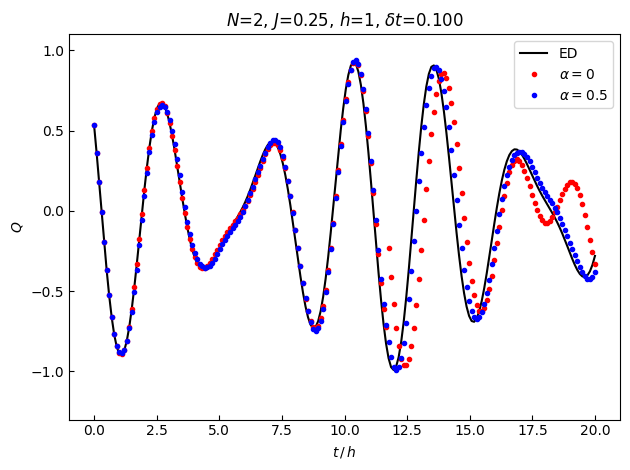

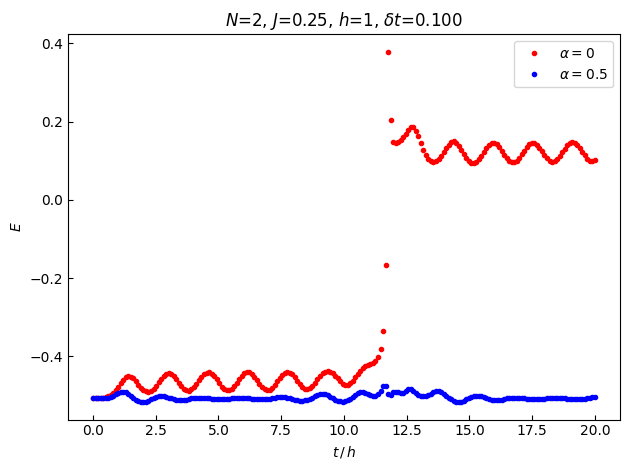

In [14]:
 
    
times_VQS = np.linspace(0.0,time_max,num_steps)
times_ED = np.linspace(0.0,time_max,len(mag_list_ED))
step = 1
plt.figure(1)
plt.plot(times_ED,mag_list_ED,label='ED',color='black')
plt.plot(times_VQS[::step],mag_list_baseline[::step],'.',label=r'$\alpha = 0$',color='r')
plt.plot(times_VQS[::step],mag_list_05[::step],'.',label=r'$\alpha = 0.5$',color='b')

plt.title(f'$N$={num_qubits}, $J$={j_coupling}, $h$={h_coupling}, $\delta t$={time_max/num_steps:.3f}')
plt.xlabel('$t\, / \, h$')
plt.ylabel('$Q$')
# plt.xlim([0,0.1])
plt.ylim([-1.3,1.1])
plt.legend()
plt.tight_layout()
# plt.savefig(f'magnetization_N{num_qubits}_J{j_coupling}_h{h_coupling}_dt{time_max/num_steps:.2f}_v1.pdf')
plt.show()

plt.figure(2)
plt.plot(times_VQS[::step],E_list_baseline[::step],'.',label=r'$\alpha = 0$',color='r')
plt.plot(times_VQS[::step],E_list_05[::step],'.',label=r'$\alpha = 0.5$',color='b')
plt.title(f'$N$={num_qubits}, $J$={j_coupling}, $h$={h_coupling}, $\delta t$={time_max/num_steps:.3f}')
plt.xlabel('$t\, / \, h$')
plt.ylabel('$E$')
# plt.xlim([0,0.1])
 
plt.legend()
plt.tight_layout()
# plt.savefig(f'magnetization_N{num_qubits}_J{j_coupling}_h{h_coupling}_dt{time_max/num_steps:.2f}_v1.pdf')
plt.show()

Compare differences

In [15]:
mag_diff_all_baseline = []
mag_diff_all_05 = []
tmp_all_baseline=0
tmp_all_05=0
for i in range(len(mag_list_ED)):
    tmp_all_baseline+=abs(mag_list_ED[i]-mag_list_baseline[i])
    tmp_all_05+=abs(mag_list_ED[i]-mag_list_05[i])
    mag_diff_all_baseline.append(tmp_all_baseline)
    mag_diff_all_05.append(tmp_all_05)
    

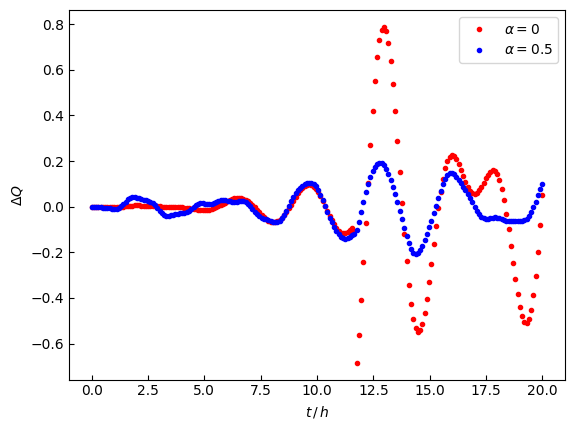

In [16]:
plt.plot(times_VQS,mag_list_ED-mag_list_baseline,'.',label=r'$\alpha = 0$',color='r')
plt.plot(times_VQS,mag_list_ED-mag_list_05,'.',label=r'$\alpha = 0.5$',color='b')
plt.xlabel('$t\, / \, h$')
plt.ylabel(r'$\Delta Q$')
plt.legend()

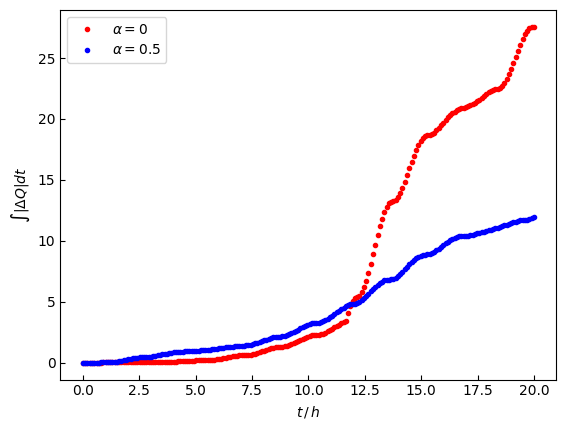

In [17]:
plt.plot(times_VQS,mag_diff_all_baseline,'.',label=r'$\alpha = 0$',color='r')
plt.plot(times_VQS,mag_diff_all_05,'.',label=r'$\alpha = 0.5$',color='b')
plt.xlabel('$t\, / \, h$')
plt.ylabel(r'$\int|\Delta Q| dt$')
plt.legend()

In [18]:
#compute fidelity
import qiskit.quantum_info as qi
from VQS_header import  make_ansatz_HVA
from quspin_header import compute_obs_ED,  compute_state,zero_state
from qiskit import QuantumCircuit
zero=np.array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [19]:
index=100
matrix_qc_baseline = qi.Operator(make_ansatz_HVA(p_list_baseline[index],num_qubits,num_layers)).to_matrix()
matrix_qc_05 = qi.Operator(make_ansatz_HVA(p_list_05[index],num_qubits,num_layers)).to_matrix()
state_ED=p_list_ED[:,index]


In [20]:

    
def getFidelity(num_qubits,p_list,index,sampler = sampler):
    matrix_qc = qi.Operator(make_ansatz_HVA(p_list[index],num_qubits,num_layers)).to_matrix()

    #matrix_qc=np.transpose(matrix_qc.conjugate())
    state_ED=p_list_ED[:,index]
    state_qc=matrix_qc@zero
    return abs(state_qc@state_ED)**2
    #a=matrix_qc@state_ED
    #return abs(a[0])**2

In [21]:
fid_baseline=[]
fid_05=[]
for i in range(len(p_list_baseline)):
    fid=getFidelity(num_qubits,p_list_baseline,i,sampler = sampler)
    fid_baseline.append(fid)

    fid=getFidelity(num_qubits,p_list_05,i,sampler = sampler)
    fid_05.append(fid)

<Figure size 640x480 with 0 Axes>

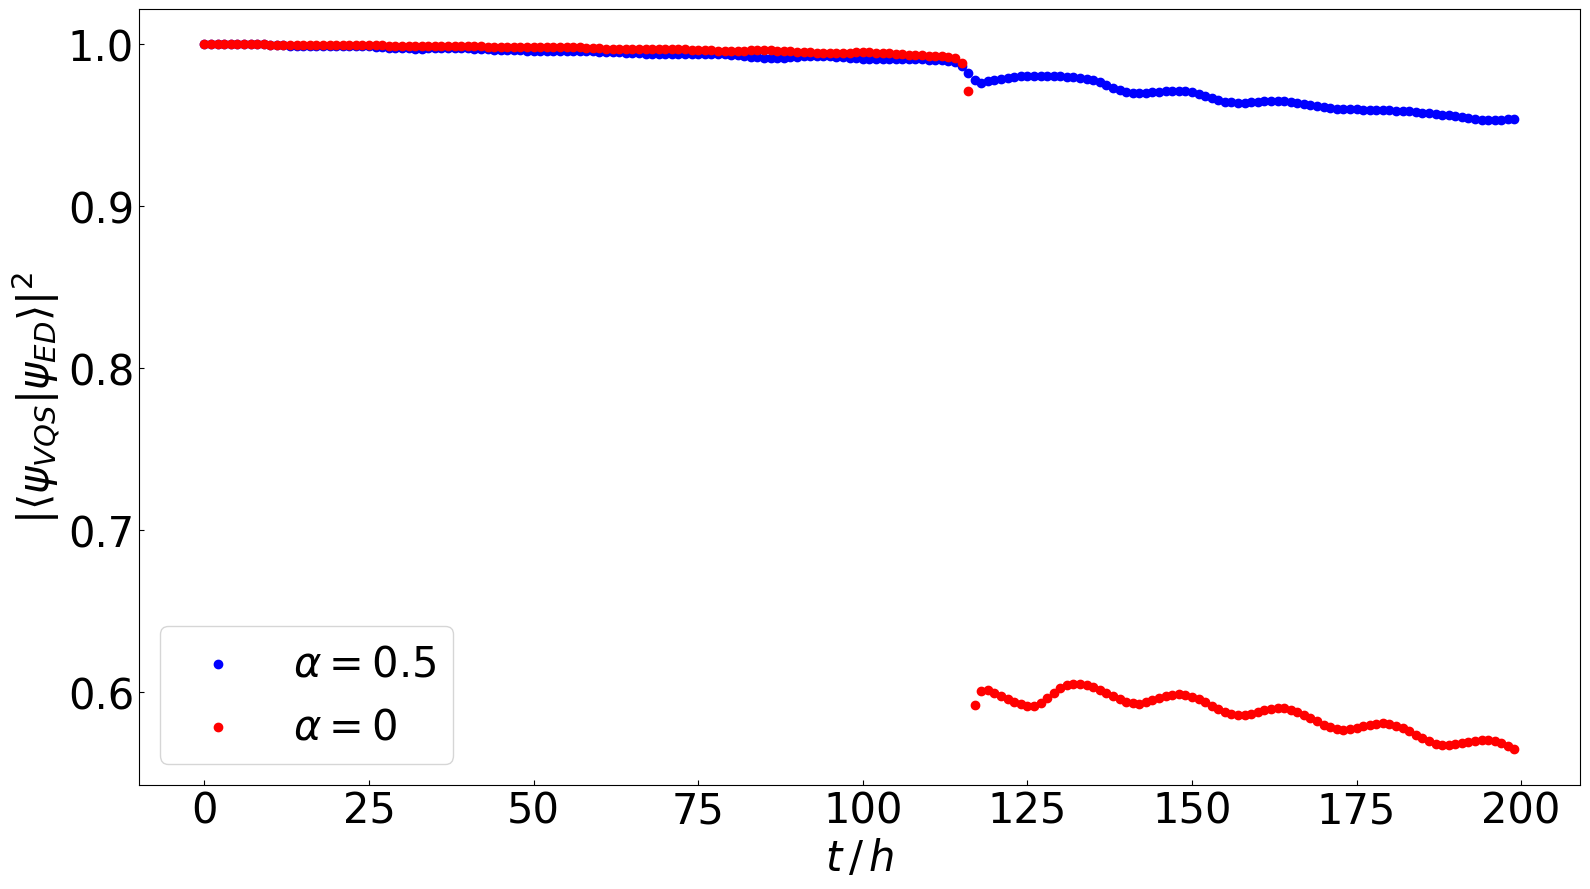

In [22]:
#using matrix:
plt.figure(1)
LabelSize=30
plt.figure(figsize=(16,9))
plt.scatter(range(len(fid_baseline)),fid_05,label=r'$\alpha = 0.5$',color='b')
plt.scatter(range(len(fid_baseline)),fid_baseline,label=r'$\alpha = 0$',color='r')
plt.legend()
#plt.xscale('log')
plt.xlabel('$t\, / \, h$',fontsize=LabelSize)
plt.ylabel(r'$|\langle \psi_{VQS} | \psi_{ED} \rangle|^{2}$',fontsize=LabelSize)
#plt.ylabel(r'$\langle \psi_{VQS} \lvert \psi_{ED} \rangle$',fontsize=LabelSize)
plt.tick_params(axis='both', which='major', labelsize=LabelSize)
plt.legend(fontsize=LabelSize)
plt.tight_layout()
# plt.savefig(f'magnetization_N{num_qubits}_J{j_coupling}_h{h_coupling}_dt{time_max/num_steps:.2f}_v1.pdf')
plt.show()



Random initialzation

In [23]:
#should compare with ED
def getDiff(mag,mag_ED,E):
    max_diff=abs(mag-mag_ED).max()
    all_diff=abs(mag-mag_ED).sum()
    E_diff= E[-1]-E[0]
    
    return max_diff,all_diff,E_diff

In [36]:
nSample=5
alpha_list=[0,1e-2,4e-2,7e-2,1e-1,5e-1,1]
max_diff={}
all_diff={}
E_diff={}
finalFid_list={}
for alpha in alpha_list:
    max_diff[str(alpha)]=[]
    all_diff[str(alpha)]=[]
    E_diff[str(alpha)]=[]
    finalFid_list[str(alpha)]=[]

In [ ]:


for i in range(nSample):
    print("starting ",i)
    params_init=np.random.rand(num_params)
    p_list_ED, mag_list_ED=getPMag_list(params_init,num_layers,num_qubits,j_coupling,h_coupling,time_max,num_steps)

    for alpha in alpha_list:
        print(alpha)
        mag_list,p_list,E_list=getMagList(params_init,num_qubits,num_layers,j_coupling,h_coupling,num_steps,
                        time_max,epsilon_det,sampler,estimator,nShots=nShots,energy_correction=True,
                       alpha=alpha)
        max_diff_tmp,all_diff_tmp,E_diff_tmp = getDiff(mag_list,mag_list_ED,E_list)    
        
        max_diff[str(alpha)].append(max_diff_tmp)
        all_diff[str(alpha)].append(all_diff_tmp)
        E_diff[str(alpha)].append(E_diff_tmp)

        finalFid=getFidelity(num_qubits,p_list,-1,sampler = sampler)
        finalFid_list[str(alpha)].append(finalFid)
        print(max_diff_tmp,all_diff_tmp,E_diff_tmp,finalFid)
        

starting  0
0
step 50: DONE
step 100: DONE
step 150: DONE
0.304065893508168 17.593608145664575 -0.15993431561933935 0.8713730515505382
0.01
step 50: DONE
step 100: DONE
step 150: DONE
0.5106287601451643 17.44220655509461 0.29855589483653944 0.7300345051058613
0.04
step 50: DONE
step 100: DONE
step 150: DONE
0.22210507568273952 12.981448247253118 0.02489214916302429 0.868776994421838
0.07
step 50: DONE
step 100: DONE
step 150: DONE
0.49655590245856424 27.199898432447444 0.004631023356588382 0.462985802229314
0.1
step 50: DONE
step 100: DONE
step 150: DONE
0.3378477414792439 16.065427380903202 -0.002265914124754631 0.8478050279348145
0.5
step 50: DONE
step 100: DONE
step 150: DONE
0.1663681054764627 9.97485602738634 0.0034835588797621497 0.9633599087358402
1
step 50: DONE
step 100: DONE
step 150: DONE
0.15046771674211373 9.25103045893989 -0.0022271901211160516 0.9685692652766175
starting  1
0
step 50: DONE
step 100: DONE
step 150: DONE
0.37981037828453107 16.58330238741358 0.241499607596

In [ ]:
ind=6
with open('{}qubits_{}layers_maxDiff'+str(ind)+'.pkl'.format(num_qubits,num_layers), 'wb') as f:
    pickle.dump(max_diff, f)

with open('{}qubits_{}layers_allDiff'+str(ind)+'.pkl'.format(num_qubits,num_layers), 'wb') as f:
    pickle.dump(all_diff, f)

with open('{}qubits_{}layers_EDiff'+str(ind)+'.pkl'.format(num_qubits,num_layers), 'wb') as f:
    pickle.dump(E_diff, f)

with open('{}qubits_{}layers_finalFid_list'+str(ind)+'.pkl'.format(num_qubits,num_layers), 'wb') as f:
    pickle.dump(finalFid_list, f)



In [ ]:
ind=1
with open('{}qubits_{}layers_maxDiff'+str(ind)+'.pkl'.format(num_qubits,num_layers), 'rb') as f:
    max_diff = pickle.load(f)

with open('{}qubits_{}layers_allDiff'+str(ind)+'.pkl'.format(num_qubits,num_layers), 'rb') as f:
    all_diff = pickle.load(f)

with open('{}qubits_{}layers_EDiff'+str(ind)+'.pkl'.format(num_qubits,num_layers), 'rb') as f:
    E_diff = pickle.load(f)


with open('{}qubits_{}layers_finalFid_list'+str(ind)+'.pkl'.format(num_qubits,num_layers), 'rb') as f:
    finalFid_list= pickle.load(f)

In [ ]:
for i in [2,3,4,5,6]:
    with open('{}qubits_{}layers_maxDiff'+str(ind)+'.pkl'.format(num_qubits,num_layers), 'rb') as f:
        max_diff_tmp = pickle.load(f)
    
    with open('{}qubits_{}layers_allDiff'+str(ind)+'.pkl'.format(num_qubits,num_layers), 'rb') as f:
        all_diff_tmp  = pickle.load(f)
    
    with open('{}qubits_{}layers_EDiff'+str(ind)+'.pkl'.format(num_qubits,num_layers), 'rb') as f:
        E_diff_tmp  = pickle.load(f)
    
    with open('{}qubits_{}layers_finalFid_list'+str(ind)+'.pkl'.format(num_qubits,num_layers), 'rb') as f:
        finalFid_list_tmp = pickle.load(f)

    for alpha in alpha_list:
        max_diff[str(alpha)] += max_diff_tmp[str(alpha)]
        all_diff[str(alpha)]  += all_diff_tmp[str(alpha)]
        E_diff[str(alpha)]  += E_diff_tmp[str(alpha)]
        finalFid_list[str(alpha)]  += finalFid_list_tmp[str(alpha)]

In [29]:
max_diff

{'0': [0.5941849137729618,
  0.40664300386776553,
  1.228769533837538,
  0.9683176054157798,
  0.4772238224864247,
  0.5941849137729618,
  0.40664300386776553,
  1.228769533837538,
  0.9683176054157798,
  0.4772238224864247,
  0.5941849137729618,
  0.40664300386776553,
  1.228769533837538,
  0.9683176054157798,
  0.4772238224864247,
  0.5941849137729618,
  0.40664300386776553,
  1.228769533837538,
  0.9683176054157798,
  0.4772238224864247,
  0.5941849137729618,
  0.40664300386776553,
  1.228769533837538,
  0.9683176054157798,
  0.4772238224864247],
 '0.01': [0.9100173446025539,
  0.9031560714756843,
  1.6494591705757862,
  0.3049752617714713,
  0.7625415483371512,
  0.9100173446025539,
  0.9031560714756843,
  1.6494591705757862,
  0.3049752617714713,
  0.7625415483371512,
  0.9100173446025539,
  0.9031560714756843,
  1.6494591705757862,
  0.3049752617714713,
  0.7625415483371512,
  0.9100173446025539,
  0.9031560714756843,
  1.6494591705757862,
  0.3049752617714713,
  0.76254154833715

In [30]:
max_diff_variations = []
all_diff_variations = []
E_diff_variations = []
finalFid_variations = []
for alpha in alpha_list:
    print(alpha)
    max_diff_variations.append(np.mean(max_diff[str(alpha)]))
    all_diff_variations.append(np.mean(all_diff[str(alpha)]))
    E_diff_variations.append(np.mean(E_diff[str(alpha)]))
    finalFid_variations.append((np.mean(finalFid_list[str(alpha)])))


0
0.01
0.04
0.07
0.1
0.5
1


In [31]:
max_diff_variations

[0.735027775876094,
 0.9060298793525292,
 0.8664283179770055,
 0.5688716236006095,
 0.5370680164337998,
 0.4058977596777691,
 0.39814156242242427]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

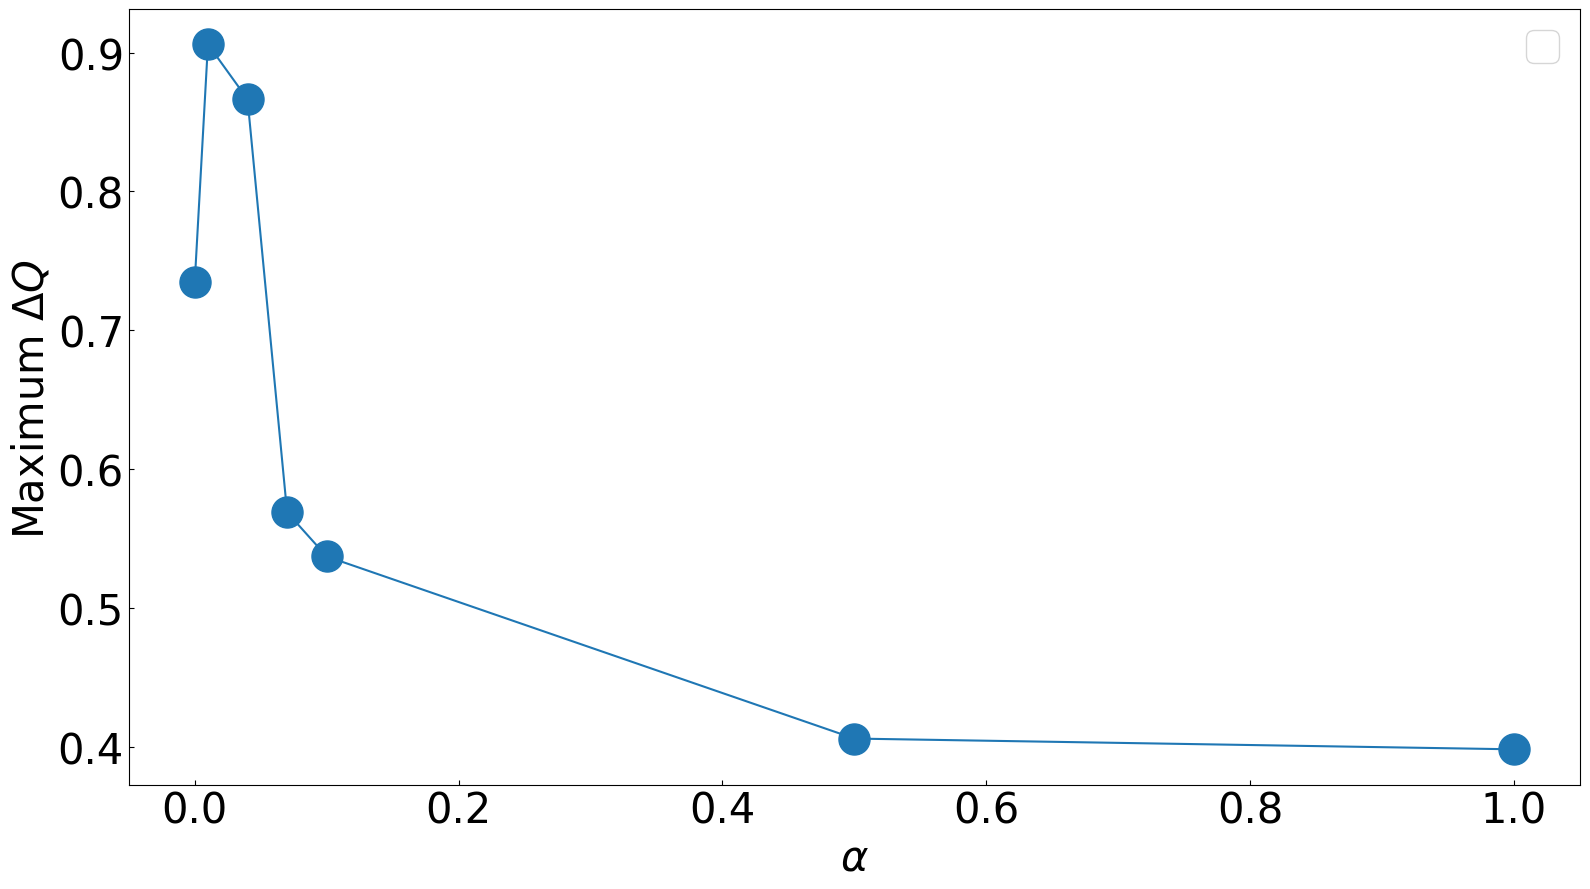

In [32]:
plt.figure(1)
LabelSize=30
plt.figure(figsize=(16,9))
plt.plot(alpha_list,max_diff_variations)
plt.scatter(alpha_list,max_diff_variations,s=500)
#plt.xscale('log')
plt.xlabel(r'$\alpha$',fontsize=LabelSize)
plt.ylabel('Maximum $\Delta Q$ ',fontsize=LabelSize)
plt.tick_params(axis='both', which='major', labelsize=LabelSize)
plt.legend(fontsize=LabelSize)
plt.tight_layout()
# plt.savefig(f'magnetization_N{num_qubits}_J{j_coupling}_h{h_coupling}_dt{time_max/num_steps:.2f}_v1.pdf')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

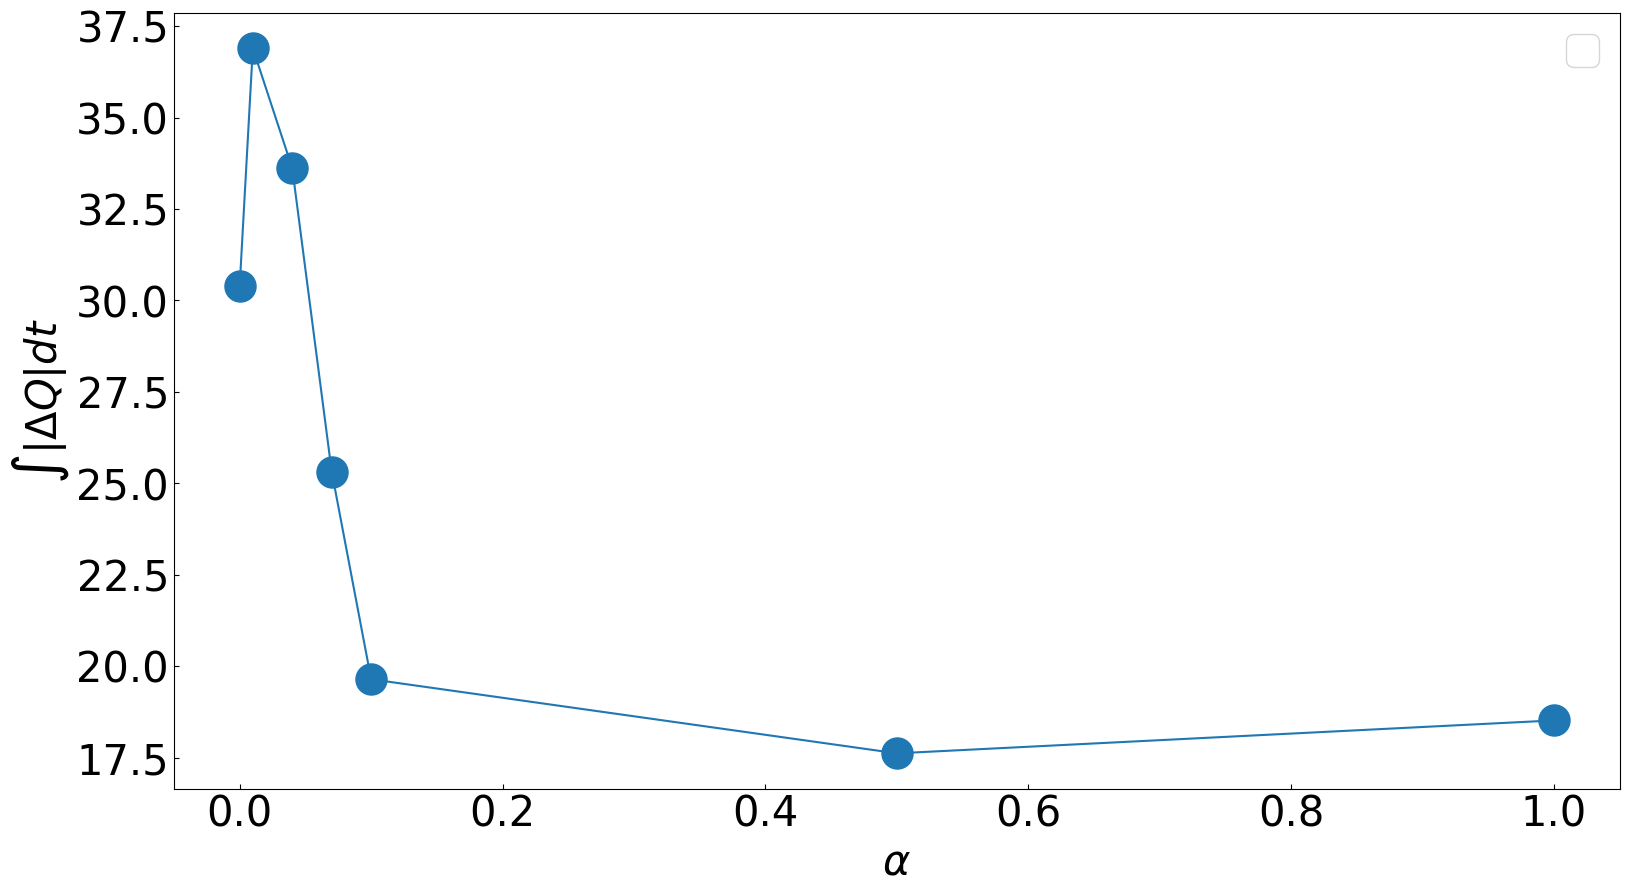

In [33]:
plt.figure(1)
LabelSize=30
plt.figure(figsize=(16,9))
plt.plot(alpha_list,all_diff_variations)
plt.scatter(alpha_list,all_diff_variations,s=500)
#plt.xscale('log')
plt.xlabel(r'$\alpha$',fontsize=LabelSize)
plt.ylabel('$\int|\Delta Q| dt$ ',fontsize=LabelSize)
plt.tick_params(axis='both', which='major', labelsize=LabelSize)
plt.legend(fontsize=LabelSize)
plt.tight_layout()
# plt.savefig(f'magnetization_N{num_qubits}_J{j_coupling}_h{h_coupling}_dt{time_max/num_steps:.2f}_v1.pdf')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

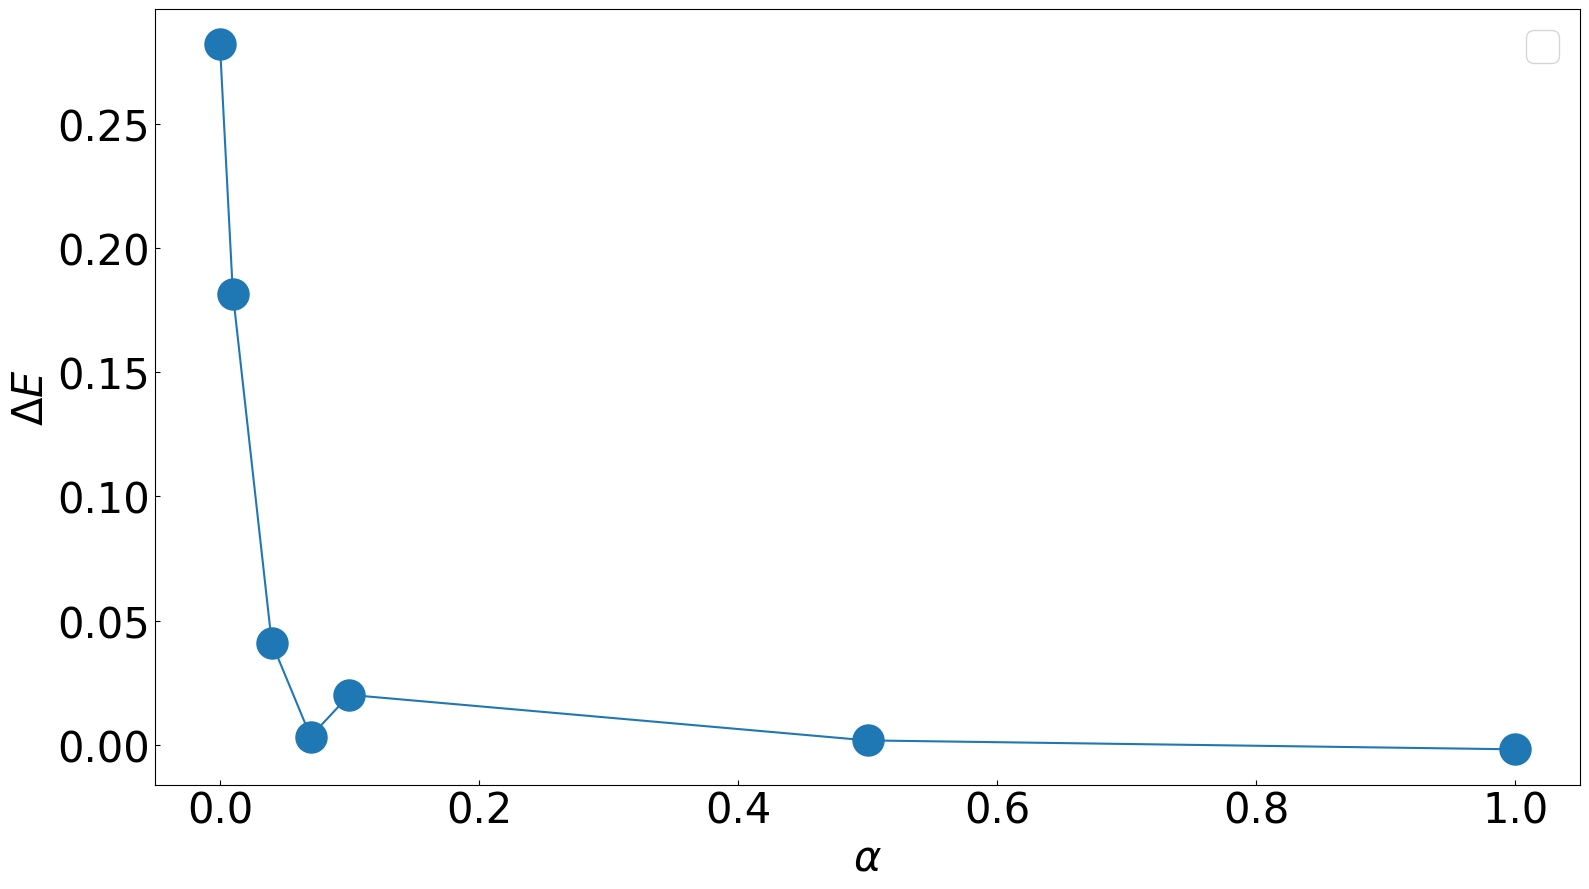

In [34]:
plt.figure(1)
LabelSize=30
plt.figure(figsize=(16,9))
plt.plot(alpha_list,E_diff_variations)
plt.scatter(alpha_list,E_diff_variations,s=500)
#plt.xscale('log')
plt.xlabel(r'$\alpha$',fontsize=LabelSize)
plt.ylabel('$\Delta E$ ',fontsize=LabelSize)
plt.tick_params(axis='both', which='major', labelsize=LabelSize)
plt.legend(fontsize=LabelSize)
plt.tight_layout()
# plt.savefig(f'magnetization_N{num_qubits}_J{j_coupling}_h{h_coupling}_dt{time_max/num_steps:.2f}_v1.pdf')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

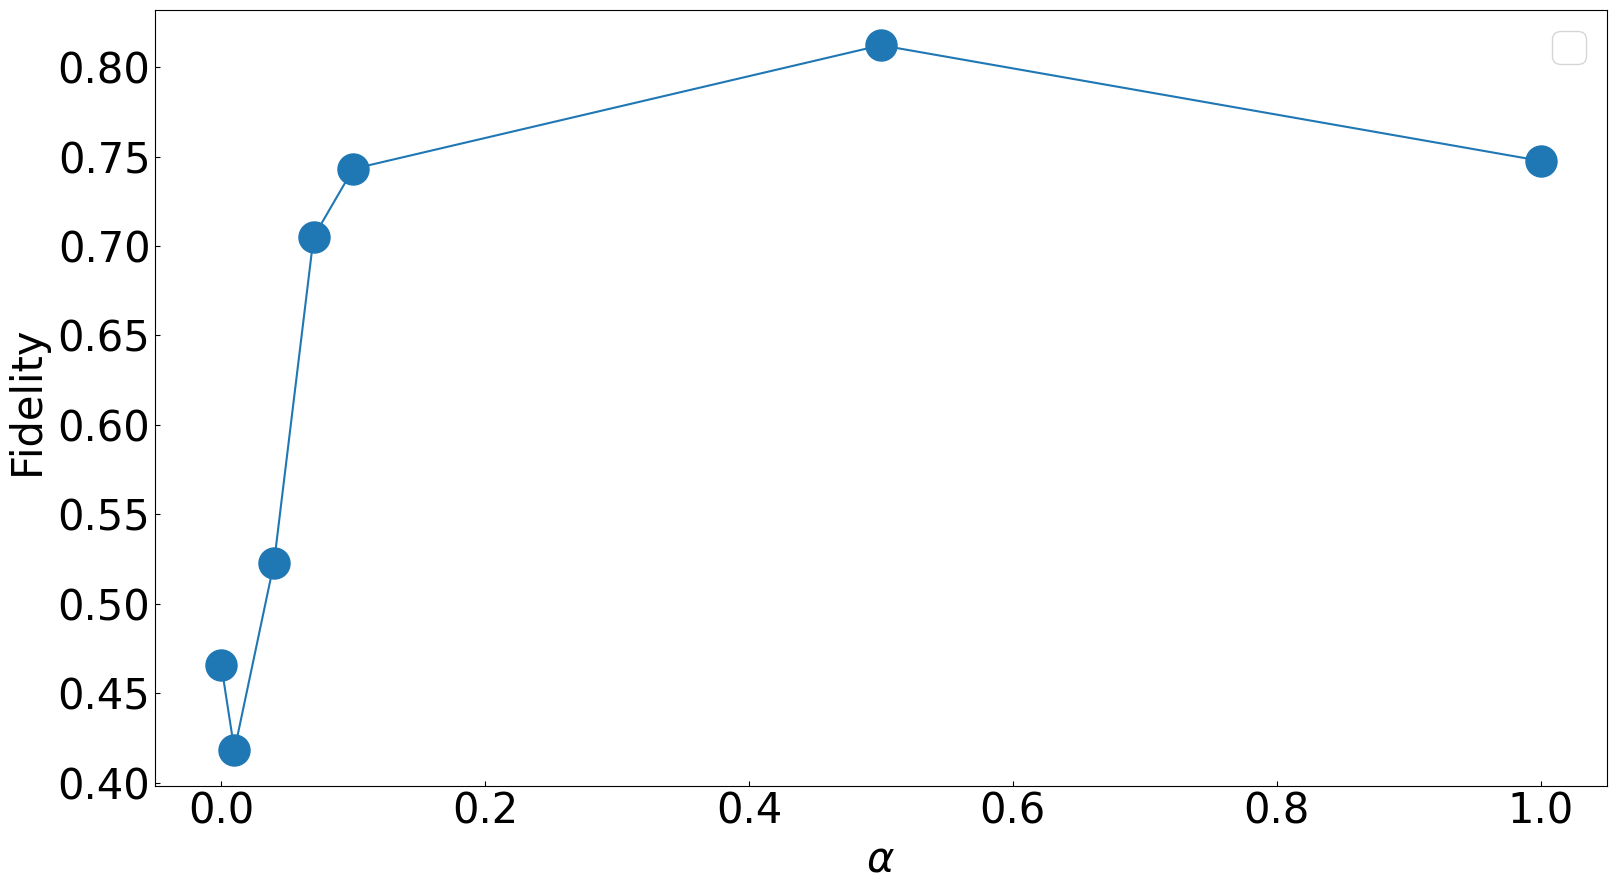

In [35]:
plt.figure(1)
LabelSize=30
plt.figure(figsize=(16,9))
plt.plot(alpha_list,finalFid_variations)
plt.scatter(alpha_list,finalFid_variations,s=500)
#plt.xscale('log')
plt.xlabel(r'$\alpha$',fontsize=LabelSize)
plt.ylabel('Fidelity ',fontsize=LabelSize)
plt.tick_params(axis='both', which='major', labelsize=LabelSize)
plt.legend(fontsize=LabelSize)
plt.tight_layout()
# plt.savefig(f'magnetization_N{num_qubits}_J{j_coupling}_h{h_coupling}_dt{time_max/num_steps:.2f}_v1.pdf')
plt.show()
